# Milestone 1 - Data Visualization Complementary Views 

## Author - Student name



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
#remove 0 HeadCount Rows
df = headcount_df[headcount_df['HeadCount']!=0] 
df.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
16,BA,9/16/2011,22,1,1,0,1,6,47
18,BA,9/17/2011,0,1,1,0,1,7,48
19,BA,9/17/2011,1,1,1,0,12,7,48
20,BA,9/17/2011,2,1,1,0,12,7,48
21,BA,9/17/2011,3,1,1,0,12,7,48


In [4]:
# group headcount by date using summation
df_time = df[['DateFormat','HeadCount']].groupby(['DateFormat']).apply(sum)
df_time = df_time.drop(columns='DateFormat')
df_time = df_time.reset_index()
df_time['date'] = pd.to_datetime(df_time['DateFormat'])
df_time = df_time.drop(columns='DateFormat')
df_time_sorted = df_time.sort_values(by='date')
df_time_sorted = df_time_sorted.reset_index().drop(columns = 'index')

In [5]:
#group DateFormat using mean, so that it can match to day of a week to daytime
mean = df[['DateFormat', 'DayOfWeek']].groupby(['DateFormat']).apply(np.mean)
mean = mean.reset_index()
mean ['datetime'] = pd.to_datetime(mean['DateFormat'])
mean = mean.drop(columns='DateFormat')
mean = mean.sort_values(by='datetime')
mean = mean.reset_index().drop(columns = 'index')

#a final table that has head count in date and day formate
df_time_sorted['day'] = mean['DayOfWeek'].astype(int)
df_time_sorted

,HeadCount,date,day
0,3203,2011-08-01,2
1,2932,2011-08-02,3
2,2640,2011-08-03,4
3,2800,2011-08-04,5
4,3419,2011-08-05,6
...,...,...,...
361,3915,2012-07-27,6
362,4789,2012-07-28,7
363,4482,2012-07-29,1
364,3318,2012-07-30,2


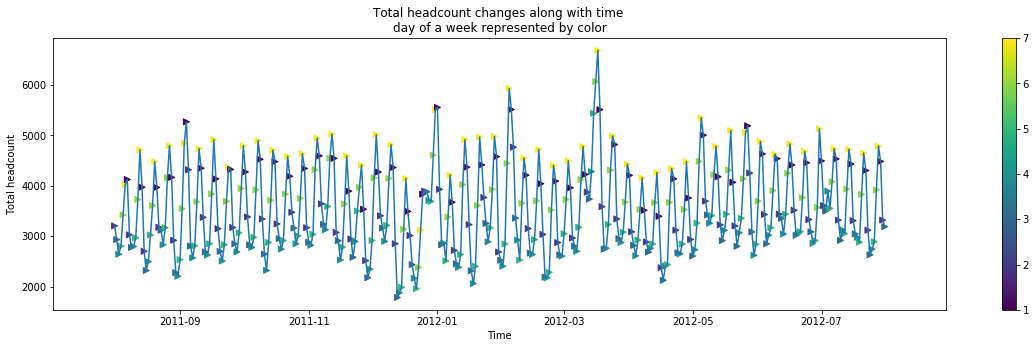

In [6]:
#plot headcount changes in given time series, showing that the head count reaches peak on Sunday, while reaches valley in 
#the middle of weekdays

fig = plt.figure(figsize=(20,5))
ax1 = plt.scatter(df_time_sorted['date'], df_time_sorted['HeadCount'], marker ='>', c = df_time_sorted['day'])
ax2 = plt.plot(df_time_sorted['date'], df_time_sorted['HeadCount'])
plt.xlabel('Time')
plt.ylabel('Total headcount')
plt.title('Total headcount changes along with time \n' +
         'day of a week represented by color')
plt.colorbar(ax1)

In [7]:
#compute frequency cross table for Hour and TablesOpen
t = pd.crosstab(df['Hour'], df['TablesOpen'])

#calculate total TablesOpen in each hour window
ts = pd.DataFrame()
for i in range(1,25):
    ts[i] = t[i]*i
ts = ts.apply(sum, axis =1).to_frame()
print(ts.head())

          0
Hour       
0     27117
1     24951
2     21022
3     15269
4     10001


In [8]:
#compute frequency cross table for Hour and TablesOcc
o = pd.crosstab(df['Hour'], df['TablesOcc'])

#calculate total table occupation in each hour window 
os = pd.DataFrame()
for i in range(1,25):
    os[i] = o[i]*i
os = os.apply(sum, axis =1).to_frame()

In [9]:
#compute frequency cross table for Hour and headcout
ave = pd.crosstab(df['Hour'], df['HeadCount'])

#calcualte total headcount in each hour windowns
aves = pd.DataFrame()
for i in range(1,25):
    aves[i] = ave[i]*i
aves = aves.apply(sum, axis =1).to_frame()
aves.columns =['total head count']


In [10]:
#create a frequency table for DayOfWeek and Opened Tables
table = pd.crosstab(df['DayOfWeek'], df['TablesOpen'])
tables = pd.DataFrame()
for i in range(1,25):
    tables[i] = table[i]*i
tables = tables.apply(sum, axis =1).to_frame()

In [11]:
#create a frequency table for DayOfWeek and Occupied Tables
occ = pd.crosstab(df['DayOfWeek'], df['TablesOcc'])
occs = pd.DataFrame()
for i in range(1,25):
    occs[i] = occ[i]*i
occs = occs.apply(sum, axis =1).to_frame()

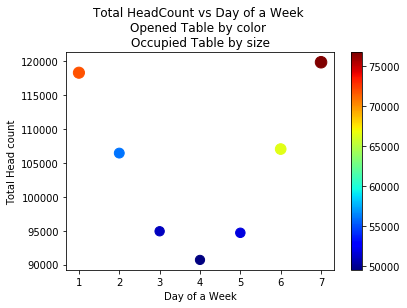

In [12]:
#create a frequency table for DayOfWeek and headcount
day = pd.crosstab(df['DayOfWeek'], df['HeadCount'])
days = pd.DataFrame()
for i in range(1,25):
    days[i] = day[i]*i
days = days.apply(sum, axis =1).to_frame()
days.columns =['total head count']

#scatter plot showing the headcount during a week,color indicates the the opened tables in casino
#and the size of spots indicates the occupied tabless.
#It shows that there are lowest number of headout on Thursday, and the number of headout reaches the peak on weekends.
#The trend is the same for headcount, opened tables, and occupied tables. 
im2 = plt.scatter(days.index, days['total head count'], c = tables[0], cmap='jet', s =occs[0]/500)
plt.xlabel('Day of a Week')
plt.ylabel('Total Head count')
plt.title('Total HeadCount vs Day of a Week \n'+
         'Opened Table by color \n' +
         'Occupied Table by size')
plt.colorbar(im2)

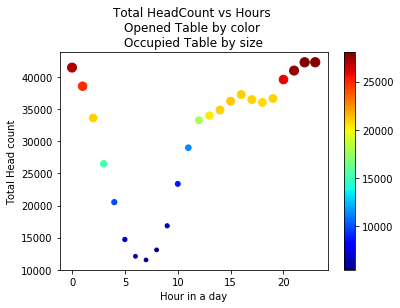

In [13]:
#scatter plot showing the headcount during a day in 24 hours,color indicates the the opened tables in casino
#and the size of spots indicates the occupied tabless.
#The figure shows that the casino has the the large flow of traffic during the night, around 21pm to 2am. 
im1 = plt.scatter(aves.index, aves['total head count'], c=ts[0], cmap='jet', s=os[0]/300)
plt.xlabel('Hour in a day')
plt.ylabel('Total Head count')
plt.title('Total HeadCount vs Hours \n'+
         'Opened Table by color \n' +
         'Occupied Table by size')
plt.colorbar(im1)

C:\Users\zhuoy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


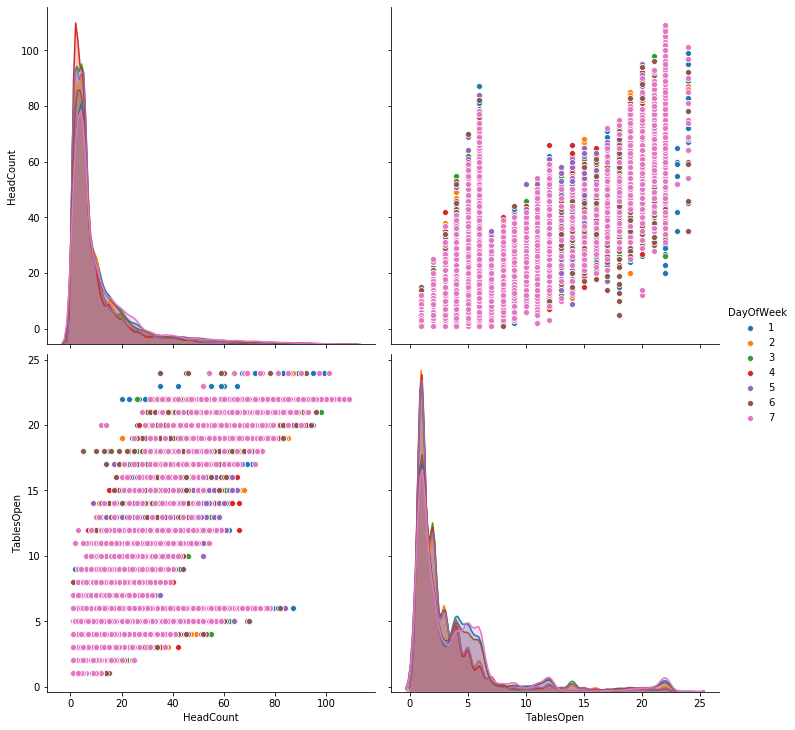

In [14]:
#facet plot to show relationships between headcount, opened tables and day, color indicates the the day of a week, upper right
#figure shows that headcount is proportional to TablesOpen. 
sns.pairplot(df[['DayOfWeek', 'HeadCount', 'TablesOpen']], hue = 'DayOfWeek', diag_kind='kde', size=5)

In [15]:
#calculate frequency table for GameCode and hour, showing the numbder of games are playing for an hour
game = pd.crosstab(df['Hour'], df['GameCode'])
games = game.apply(sum, axis =0 ).to_frame()

#calcualte frequency table for GameCode and TablesOpen
game_table = pd.crosstab(df['TablesOpen'], df['GameCode'])
game_tables = pd.DataFrame()
for i in range(0,24):
#     print(game_table.iloc[i])
    game_tables[i] = game_table.iloc[i]* (i+1)
    
#Summing all opened tables for each game type
game_tables = game_tables.apply(sum, axis=1)

Text(0.5, 1.0, 'HeadCount vs GameCode \nTotal tablesOpen represented by color')

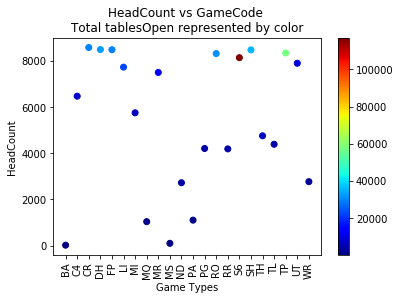

In [16]:
#Scatter plot for game types with headcount vs game types
im3 = plt.scatter(games.index, games[0], c=game_tables, cmap='jet')
plt.xticks(rotation = 'vertical');
plt.xlabel('Game Types')
plt.ylabel('HeadCount')
plt.colorbar(im3)
plt.title('HeadCount vs GameCode \n' +
         'Total tablesOpen represented by color')

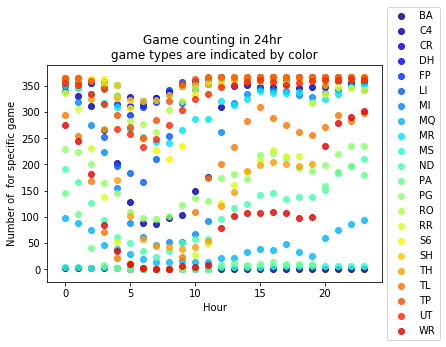

In [17]:
#Scatter plot shows the number of tables for each game type in 24 hr
#Game tyeps are represented by colors
import matplotlib.cm as cm
x = np.arange(24)
colors= cm.jet(np.linspace(0, 1, len(x)))

for i,c in zip(game.columns.values, colors):
    plt.scatter(game.index, game[i], label = i, color =c, alpha =0.8)
    
plt.xlabel('Hour')
plt.ylabel('Number of  for specific game')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Game counting in 24hr \n'+
         'game types are indicated by color');

In [18]:
#create a new table for facet plot
col = pd.DataFrame()
col['OpenTable'] =ts[0]
col['OccupiedTable'] = os[0]
col['HeadCount'] = aves['total head count']
col = col.reset_index()
col.head()

,Hour,OpenTable,OccupiedTable,HeadCount
0,0,27117,24436,41514
1,1,24951,21633,38610
2,2,21022,17487,33648
3,3,15269,12488,26514
4,4,10001,8342,20533


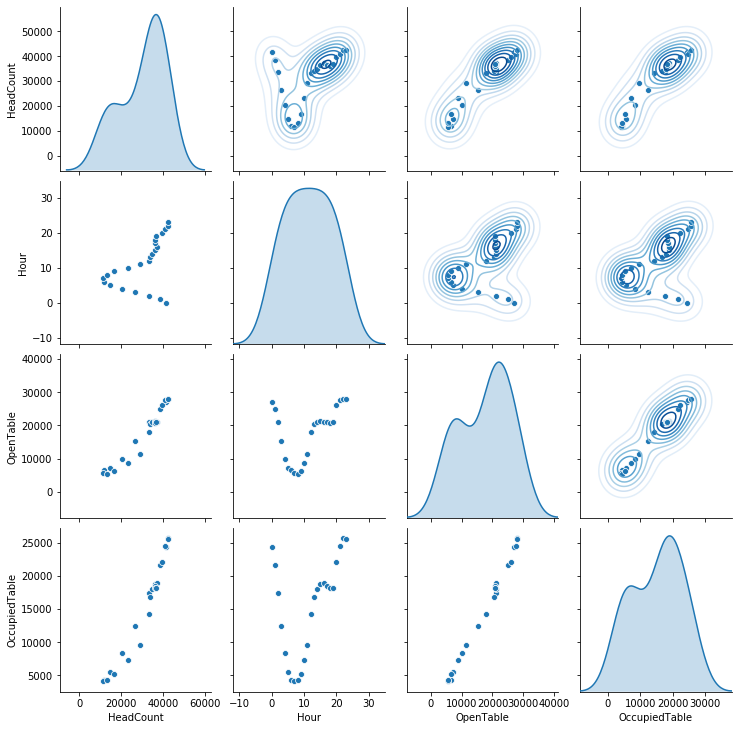

In [19]:
#facet plot for headcount, hour, opened table, and occupied tables.
sns.pairplot(col[['HeadCount', 'Hour','OpenTable','OccupiedTable']], diag_kind='kde').map_upper(sns.kdeplot, cmap='Blues')